# Analisando o engajamento do Instagram

### O que queremos responder?
- Qual tipo de conteúdo **mais engaja** no Instagram da minha empresa?
<br><br>
- Temos a base de dados do Instagram **desde que o usuário começou a postar na marca até o dia 27/março**
<br><br>
- Ele também dá alguns direcionamentos:
    - Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio)

### Vamos importar e visualizar a nossa base

In [ ]:
# Importando o pandas

In [ ]:
# Importar a base em excel
# - Base: 08. Analisando o engajamento no Instagram.xlsx

In [ ]:
# Visualizando as 5 primeiras linhas

### Como ele pediu para não considerar a coluna visualizações, vamos retirar essa coluna da base

**O .drop() permite apagar uma coluna ou linha da base:** <br>
base<font color="blue">**.drop(**</font>nome_coluna,axis=1<font color="blue">**)**</font>
- O axis = 1 se refere a coluna, enquanto axis = 0 se refere a linha
- Devemos passar o nome da coluna que queremos apagar da base
- Em caso de mais de 1 coluna, passamos a lista entre colchetes

In [ ]:
# Apagando a coluna "Visualizações"
base = base.drop("Visualizações",axis=1)

In [ ]:
# Visualizando novamente as 5 primeiras linhas

In [ ]:
# Visualizando as 5 últimas linhas

In [ ]:
# Tamanho da base

In [ ]:
# Se a base for pequena, o display mostra a base completa

In [ ]:
# Verificando as informações

### Carrossel possui apenas 8 valores não nulos
- Vamos entender os valores de carrossel

In [ ]:
# Contando os valores que aparecem na coluna Carrossel

- Na verdade, os valores nulos são de postagens que não são carrossel. Sendo assim o nulo deveria ser "N"

### Tratando os valores nulos

In [ ]:
# Filtrando os valores em que carrossel é nulo

In [ ]:
# Buscando valores que NAO sao nulos

In [ ]:
# Selecionando apenas a coluna Carrossel

In [ ]:
# Agora vamos atribuir o valor N para essa coluna

**Verificando novamente os valores de Carrossel:**

In [ ]:
# Verificando novamente os valores dessa coluna

### Mostrando as informações estatísticas

In [ ]:
# Descrição estatística da base

### Visualizando essas informações de maneira gráfica

In [ ]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários
base.plot(kind="scatter",x="Data",y="Curtidas",figsize=(14,8));

In [ ]:
# Podemos colocar curtidas e comentários no mesmo gráfico
ax = base.plot(kind="scatter",x="Data",y="Curtidas",color="blue",label="Curtidas",figsize=(14,8));
base.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8),ax=ax);

In [ ]:
# A escala de curtidas pode estar atrapalhando a visualização, por isso vamos deixar comentários em um gráfico separado
base.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8));

- O gráfico e as informações estatítiscas não estão dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários
- Precisamos verificar se existe um padrão usando as outras colunas de informações

### A primeira coisa que podemos fazer é pegar os 5 primeiros registros com mais e menos curtidas

In [ ]:
# Ordenando os valores
base.sort_values(by="Curtidas",ascending=False).head()

In [ ]:
# Selecionando os 5 últimos valores 

- Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas
<br><br>
- **Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**

### Vamos usar o <font color="blue">group by</font> para entender melhor os dados

**O group by é muito análogo a tabela dinâmica que fazemos no Excel**

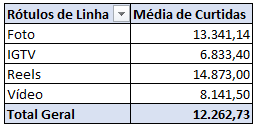

In [ ]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Agrupando as informações por tipo
base.groupby("Tipo")["Comentários"].count()

- **Nesse caso pode parecer que vídeo e IGTV são estratégias ruins que não devem ser usadas**

**O groupby nos permite agregar os dados, o que facilita muito a visualização** <br>
base.<font color="blue">**groupby**</font>("<font color="red">**coluna1**</font>")["<font color="green">**coluna2**</font>"].<font color="purple">**funcao_agregacao()**</font>

- O groupby vai agregar pela <font color="red">**coluna1**</font>
- A <font color="purple">**função de agregação**</font> será aplicada na <font color="green">**coluna2**</font>

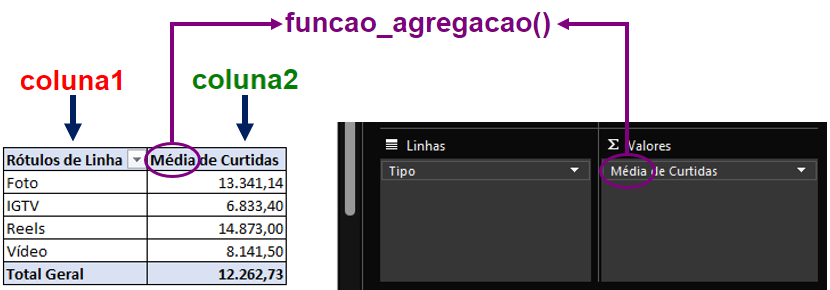

**Inclusive é possível agregar por mais de 1 coluna:** <br>

In [ ]:
# Agrupando por Tipo e Pessoas
base.groupby(["Tipo","Pessoas"])["Curtidas"].mean()

**E também aplicar a função de agregação em várias outras colunas:** <br>

In [ ]:
base.groupby(["Tipo","Pessoas"])[["Curtidas",'Comentários']].mean()

In [63]:
# Incluindo a coluna de campanhas

- O groupby já permite ver que publicações de campanha tem um grande engajamento e com foto de pessoas também

**Podemos então fazer os agrupamentos que acharmos melhor para entender os nossos dados**

In [ ]:
# Somente para pessoas

- **Postagens com pessoas engajam muito mais para essa marca, sendo 3 vezes maior de quando não tem pessoas**

In [ ]:
# Somente para campanhas

- **Quando é uma postagem de campanha, o engajamento também é melhor!**

In [ ]:
# Carrossel (sem filtrar a base)

In [ ]:
# Podemos também filtrar a base

- **A média sem usar carrossel é melhor do que quando usamos, então não é algo que possa impactar tanto no resultado das mídias dessa empresa olhando inicialmente**
    - Nesse caso devemos filtrar apenas as fotos pois só temos carrossel em fotos. Sem esse filtro estaríamos comparando coisas erradas

**Colocando pessoas e campanhas juntos podemos ver como se dá essa diferença**

In [64]:
# Agregando por pessoas e campanhas

- **A média quando tem pessoas E é publicação de campanhas é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha passa para quase 10 mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas**
<br><br>
- **Nesse caso a gente já consegue mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento**

In [65]:
# Agregando por pessoas, campanhas e tipo

- **Analisando novamente a questão do vídeo, ele não parece mais tão ruim assim. Quando feito em campanha e usando pessoas ele teve um resultado bom, inclusive próximo a foto**
- O que poderia ter levado a média baixa é que só temos vídeo ou COM pessoa e COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoa ou campanha)
- Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

#### Inclusive podemos entender o que havia gerado a média baixo no vídeo

In [ ]:
# Vamos filtrar a base apenas onde o tipo é Vídeo

- **Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo. Quando o vídeo foi feito com pessoas aproveitando trends e datas comemorativas o resultado foi muito bom!**

## Conclusões
- **Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que não possui ninguém**
- **Postagens em épocas de campanha também possuem um melhor engajamento**
- **Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca**